# Demonstration of greedy approaches for n-armed bandit problem

### Initialising the actions and corresponding rewards

- Rewards for each action will be sampled from a normal distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_arms = 10
t = 2000

### Rewards

We define a true mean reward for all arms by sampling them from a normal distribution (mean = 0, stddev = 1).

We get rewarded for the actions by sampling a normal distribution with mean = true mean of that action and stddev = 1

In [3]:
q_true = np.random.normal(0, 1, n_arms)

def get_reward(mean):
    return np.random.normal(mean, 1)

### Greedy

1.   Pick an action with random probability
2.   Evaluate the average reward for that action
3.   Pick an action with max reward (greedy)
4.   Repeat steps 2 and 3 for t steps





In [4]:
def greedy():
    arm_count = {i: 0 for i in range(n_arms)}
    q_t = [0] * n_arms
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        picked = np.argmax(q_t)                                                                                 # pick an action greedily
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]                                  # update average reward for that action
        step_vs_reward[step] = average_reward / step

    plt.plot(list(step_vs_reward.keys()), list(step_vs_reward.values()))
    return step_vs_reward

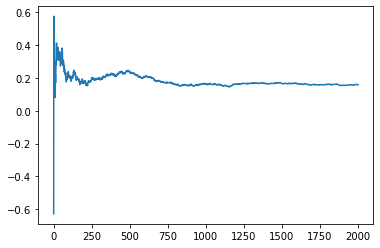

In [5]:
_ = greedy()

### Epsilon Greedy

To support exploration, we pick action greedily with a probability (1 - ε) and we pick an action randomly with a probability ε.

It means the prob of picking the greedy action is (1 - ε) + (ε / n_arms). Since the greedy action is a part of random selection.

In [6]:
def epsilon_greedy(epsilon):
    arm_count = {i: 0 for i in range(n_arms)}
    arms = list(arm_count.keys())
    q_t = [0] * n_arms
    prob = [1 / n_arms] * n_arms                                                                                              # initialize with uniform probability
    step_vs_reward = {}
    average_reward = 0
    
    for step in range(1, t + 1):
        picked = np.random.choice(arms, p=prob)                                                                               # pick an action with some probability
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]                                                # update average reward for that action
        step_vs_reward[step] = average_reward / step

        max = np.argmax(q_t)
        prob = [epsilon / n_arms] * n_arms                                                                                    # pick randomly from the actions with probability ε
        prob[max] += (1 - epsilon)                                                                                            # pick greedily with probability (1 - ε) + ε / n_arms

    plt.plot(list(step_vs_reward.keys()), list(step_vs_reward.values()))
    return step_vs_reward

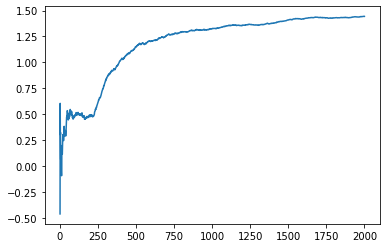

In [7]:
_ = epsilon_greedy(0.1)

### Softmax

Even if the highest q_t value arm is greater than the 2nd highest by a very small margin, ε-greedy will assign the 2nd best arm the same probability as the rest of the "bad" arms (1 / n_arms for all the other arms). 

For this, one way is to use a softmax function to convert q_t into a distribution for picking the arms. Softmax will give high probability to high values and low for low values. This will ensure that all the arms receive a probability on the basis of their q_t values and not equal.

In [8]:
def softmax(logits):
    logits = np.exp(logits)
    return logits / logits.sum()

In [9]:
def softmax_greedy():
    arm_count = {i: 0 for i in range(n_arms)}
    arms = list(arm_count.keys())
    q_t = [0] * n_arms
    prob = [1 / n_arms] * n_arms                                                                                              # initialize with uniform probability
    step_vs_reward = {}
    average_reward = 0
    
    for step in range(1, t + 1):
        picked = np.random.choice(arms, p=prob)                                                                               # pick an action with some probability
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]                                                # update average reward for that action
        step_vs_reward[step] = average_reward / step

        prob = softmax(q_t)                                                                                                   # pick greedily with probability given by softmax(q_t)

    plt.plot(list(step_vs_reward.keys()), list(step_vs_reward.values()))
    return step_vs_reward

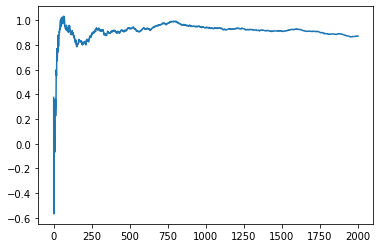

In [10]:
_ = softmax_greedy()